In [49]:
import pandas as pd
from fuzzywuzzy import fuzz
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np

import os
from collections import Counter
import pandas as pd
import numpy as np
import json
#from scholarly import scholarly


import os
import sys


from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
#import mpld3
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import sys
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)


In [50]:
!pip install seaborn
!pip install wordcloud

In [51]:
data  = pd.read_csv("summary_statistics_table_export.tsv", sep='\t')
print(data.head())
print(data.columns)

  firstAuthor accessionId publicationDate            journal  \
0  Pilling LC  GCST006697      2017-12-01  Aging (Albany NY)   
1  Pilling LC  GCST006698      2017-12-01  Aging (Albany NY)   
2  Pilling LC  GCST006699      2017-12-01  Aging (Albany NY)   
3  Pilling LC  GCST006696      2017-12-01  Aging (Albany NY)   
4  Pilling LC  GCST006700      2017-12-01  Aging (Albany NY)   

                                               title  \
0  Human longevity: 25 genetic loci associated in...   
1  Human longevity: 25 genetic loci associated in...   
2  Human longevity: 25 genetic loci associated in...   
3  Human longevity: 25 genetic loci associated in...   
4  Human longevity: 25 genetic loci associated in...   

                                       reportedTrait           efoTraits  \
0  Parental longevity (combined parental attained...  parental longevity   
1       Parental longevity (both parents in top 10%)  parental longevity   
2         Parental longevity (mother's age at deat

Number of unique values in 'efoTraits': 12995
                        efoTraits  Frequency
0       blood protein measurement       5238
1          metabolite measurement       4039
2  brain connectivity measurement       1703
3      gut microbiome measurement       1554
4               employment status        687


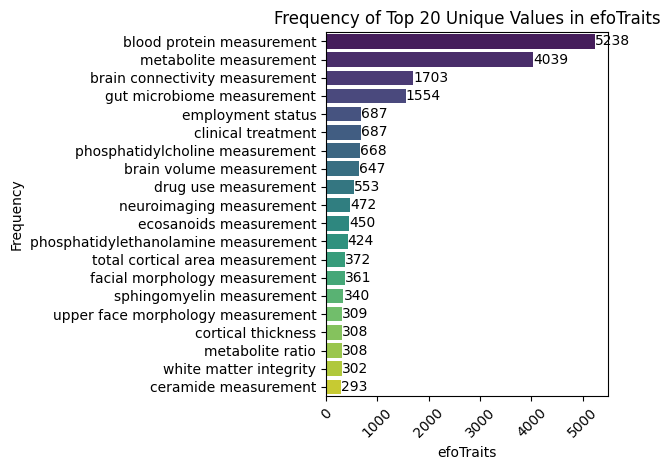

Number of unique values in 'reportedTrait': 48679
              reportedTrait  Frequency
0           Type 2 diabetes         29
1           Body mass index         27
2                    Height         26
3  Total cholesterol levels         24
4            Platelet count         22


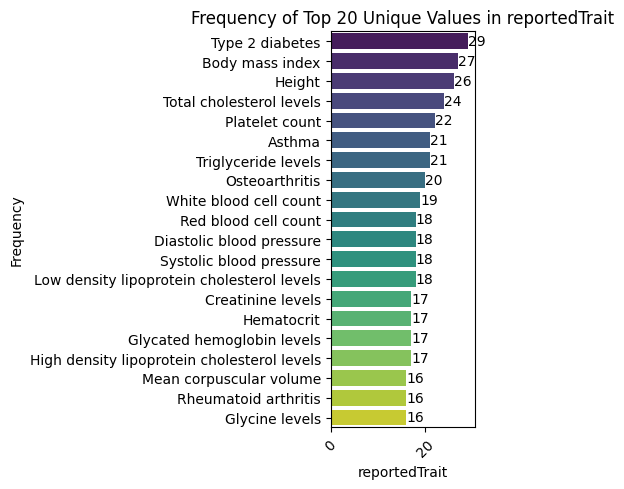

Number of unique values in 'firstAuthor': 750
    firstAuthor  Frequency
0    Backman JD       7972
1  Surapaneni A       6790
2  Gudjonsson A       4782
3        Chen Y       4445
4      Smith SM       3935


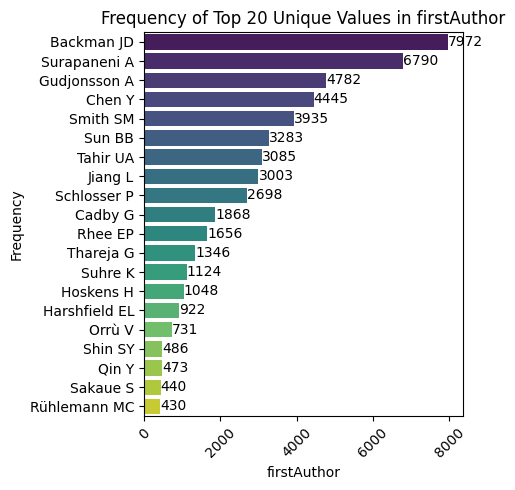

Number of unique values in 'journal': 182
        journal  Frequency
0     Nat Genet      14862
1    Nat Commun      13066
2        Nature      11509
3    Kidney Int       8004
4  Nat Neurosci       3936


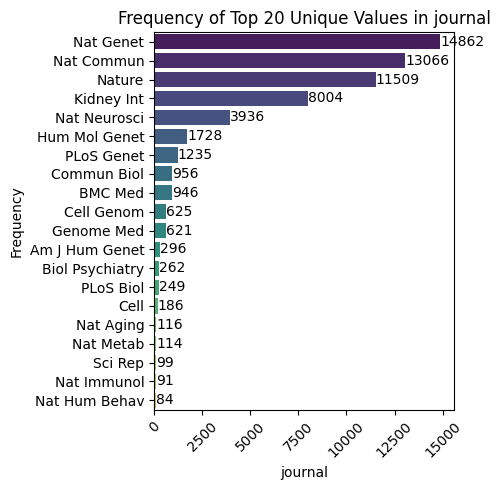

Number of unique values in 'discoverySampleAncestry': 8978
                             discoverySampleAncestry  Frequency
0             466 African American or Afro-Caribbean       6790
1                                      3301 European       3283
2            2466 African American or Afro-Caribbean       3085
3                                     21081 European       1777
4  2935 Greater Middle Eastern (Middle Eastern, N...       1301


C:\Users\kl\AppData\Local\Temp\ipykernel_10052\2273331098.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


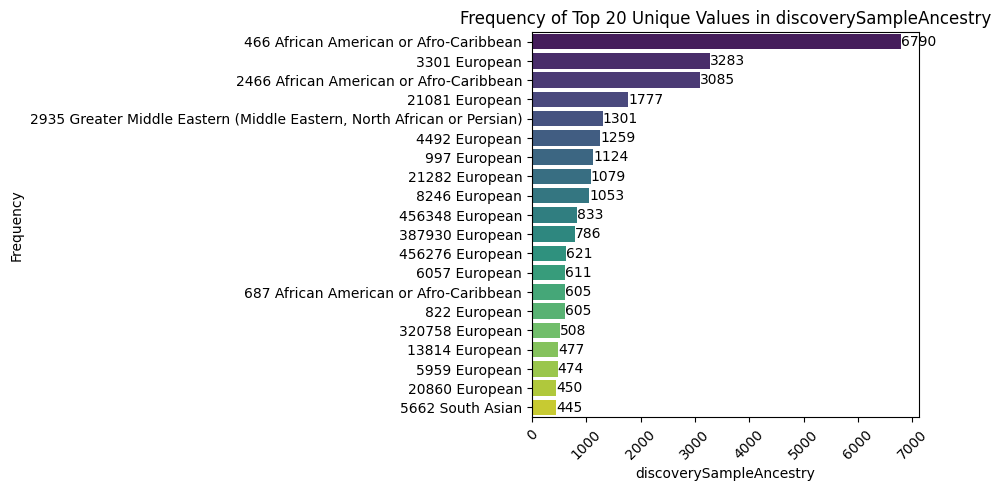

Number of unique values in 'genotypingTechnologies': 22
                              genotypingTechnologies  Frequency
0                       Genome-wide genotyping array      46550
1                             Genome-wide sequencing       5236
2                              Exome-wide sequencing       4375
3  Exome-wide sequencing,Genome-wide genotyping a...       4022
4                             Exome genotyping array         74


C:\Users\kl\AppData\Local\Temp\ipykernel_10052\2273331098.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


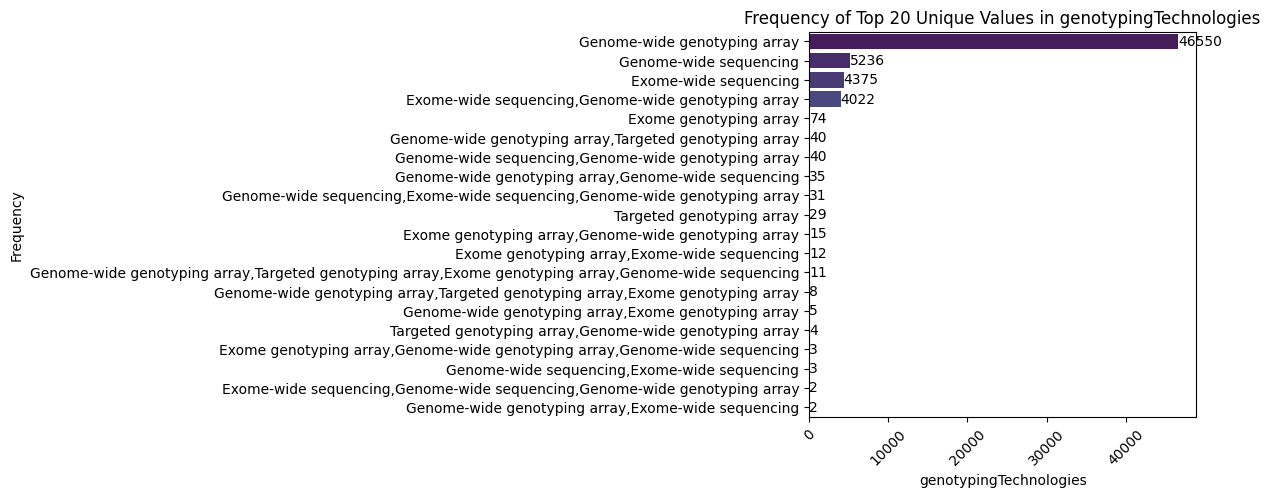

<Figure size 500x500 with 0 Axes>

In [53]:
def plot_unique_values(data, column_name):
    # Find unique values and their frequencies
    unique_values = data[column_name].value_counts().reset_index()
    unique_values.columns = [column_name, 'Frequency']
    
    # Print the number of unique values
    num_unique_values = len(unique_values)
    print("Number of unique values in '{}': {}".format(column_name, num_unique_values))
    
    # Save unique values and frequencies to a CSV file
    unique_values.to_csv(column_name+".csv", index=False)
    
    # Plot top 20 unique values using seaborn
    #plt.figure(figsize=(10, 6))
    print(unique_values.head(5))
    sns.barplot(x='Frequency', y=column_name, data=unique_values.head(20), palette='viridis', orient='h')
    for i, v in enumerate(unique_values['Frequency'].head(20)):
        plt.text(v, i, str(v), ha='left', va='center', color='black')
        
    plt.xticks(rotation=45)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Frequency of Top 20 Unique Values in {}'.format(column_name))
    plt.tight_layout()
    plt.savefig(column_name+".png")
    plt.show()

    plt.figure(figsize=(5, 5))
 
plot_unique_values(data, column_name='efoTraits') 
plot_unique_values(data, column_name='reportedTrait')

plot_unique_values(data, column_name='firstAuthor')
plot_unique_values(data, column_name='journal')


plot_unique_values(data, column_name='discoverySampleAncestry')
plot_unique_values(data, column_name='genotypingTechnologies')







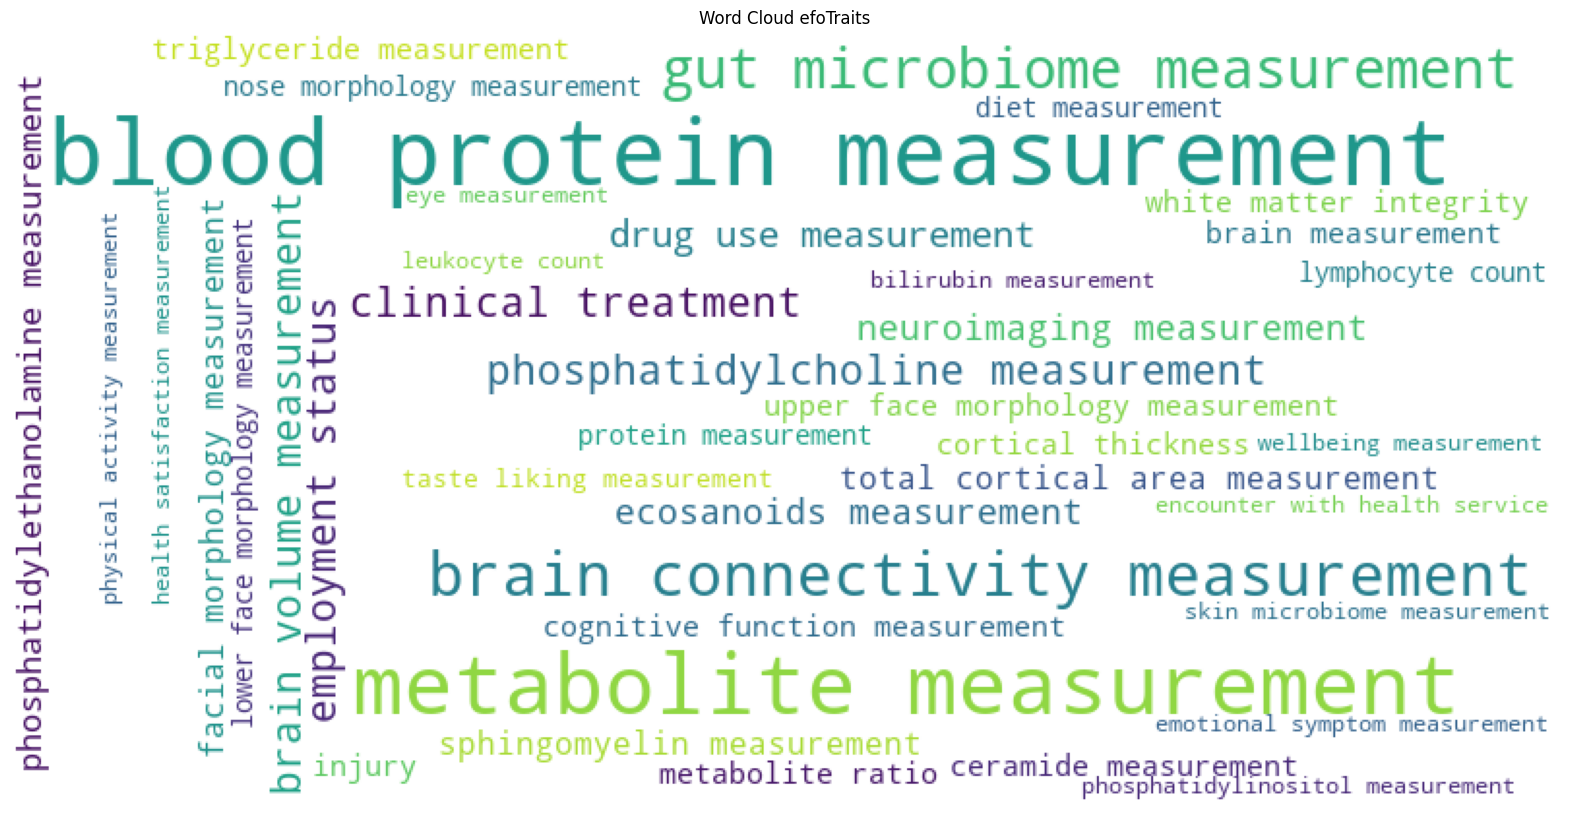

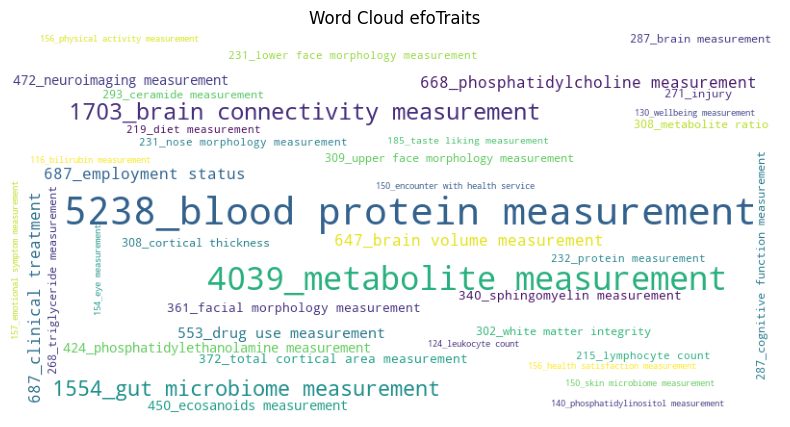

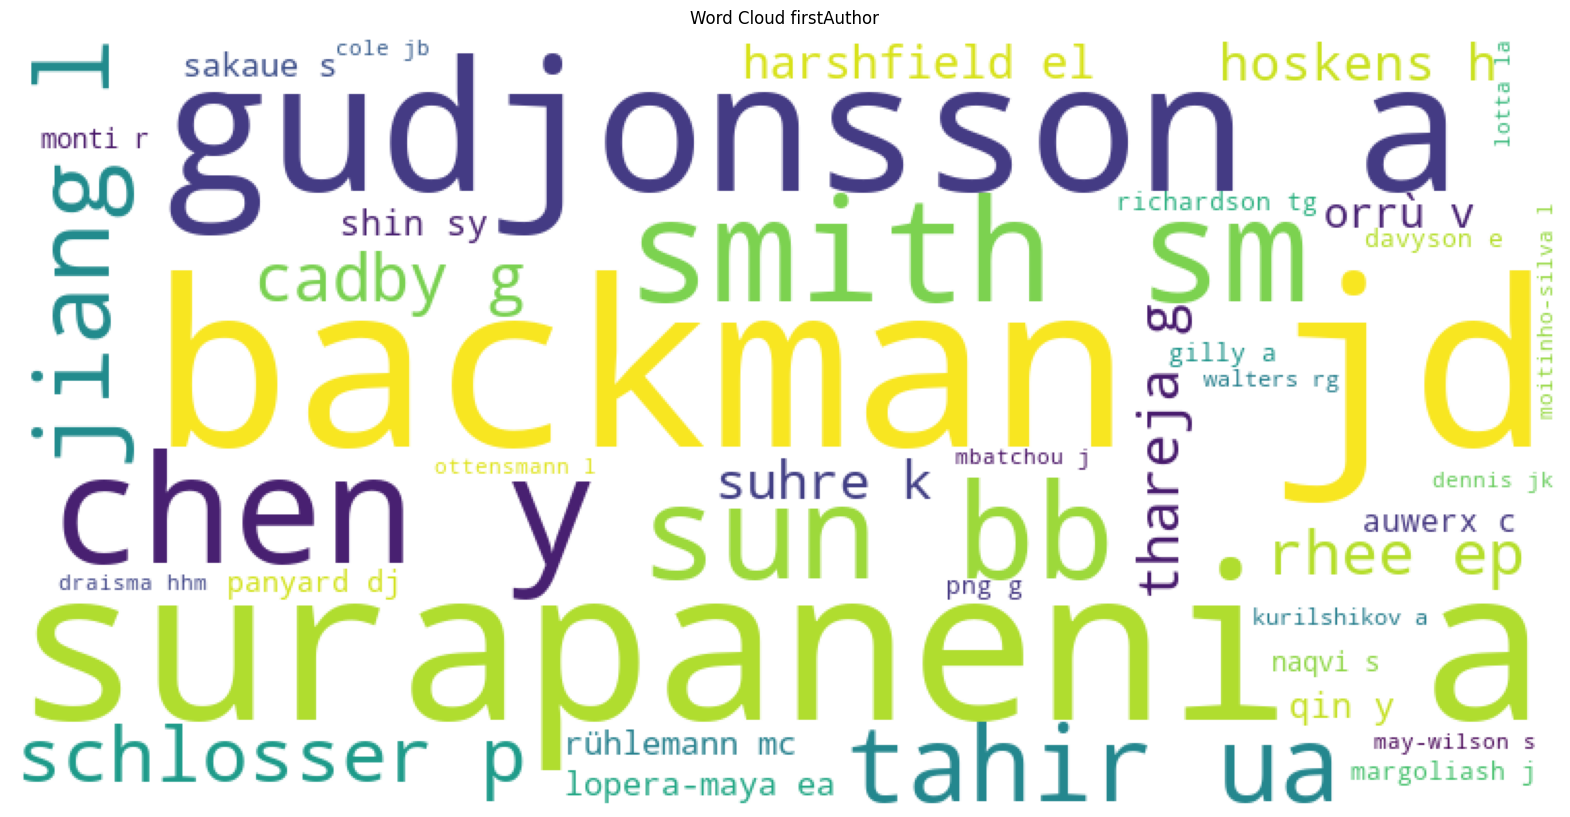

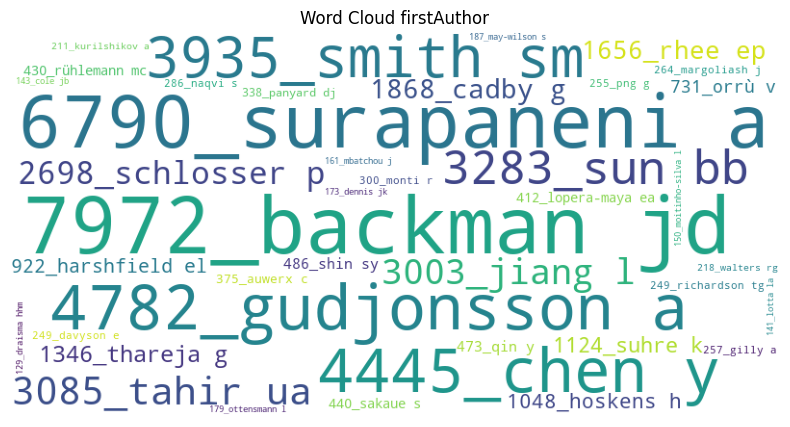

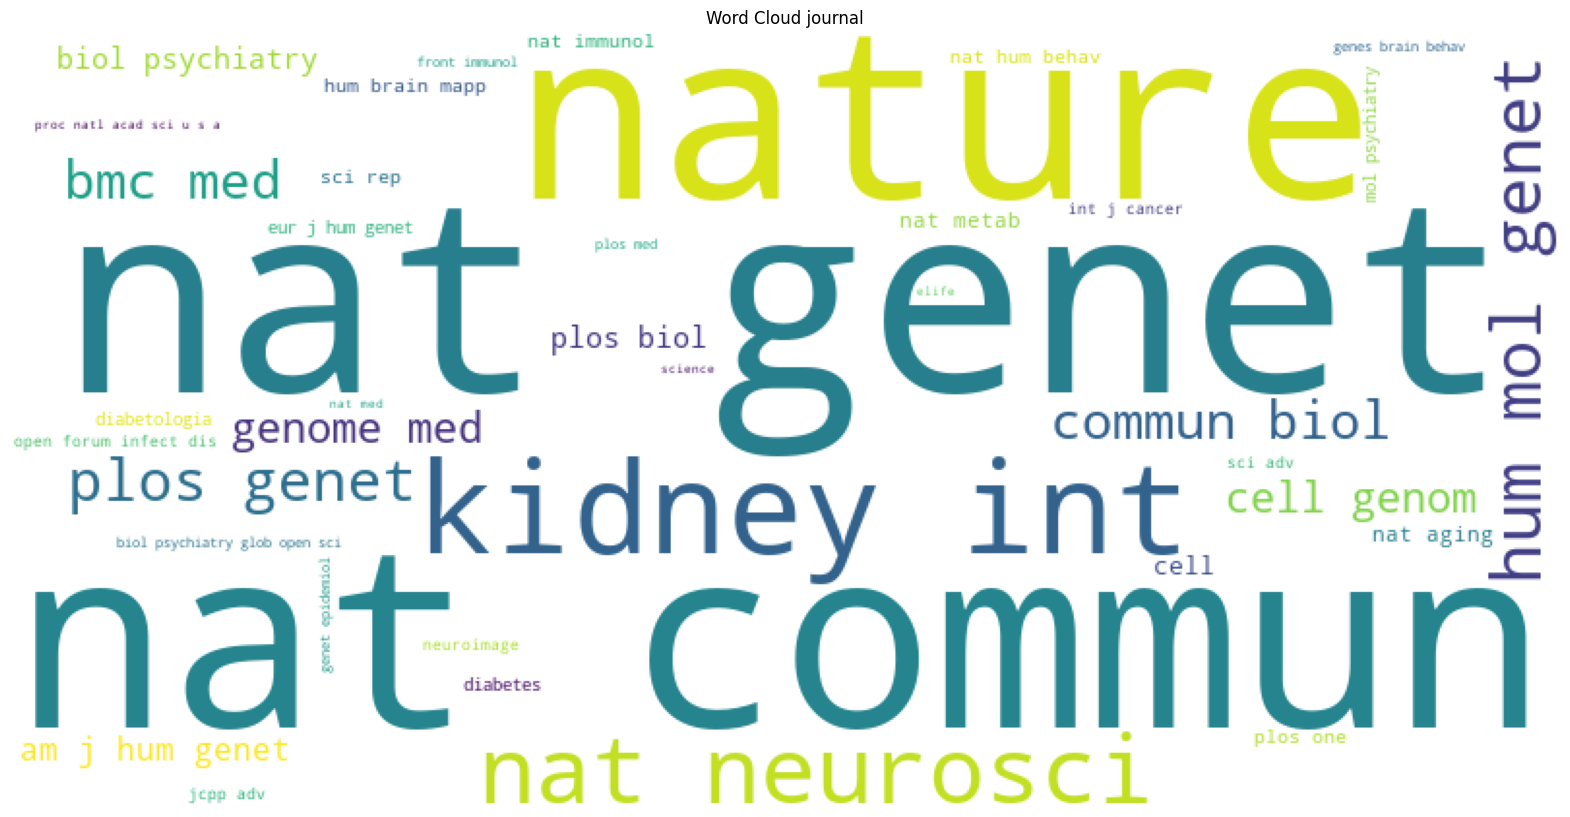

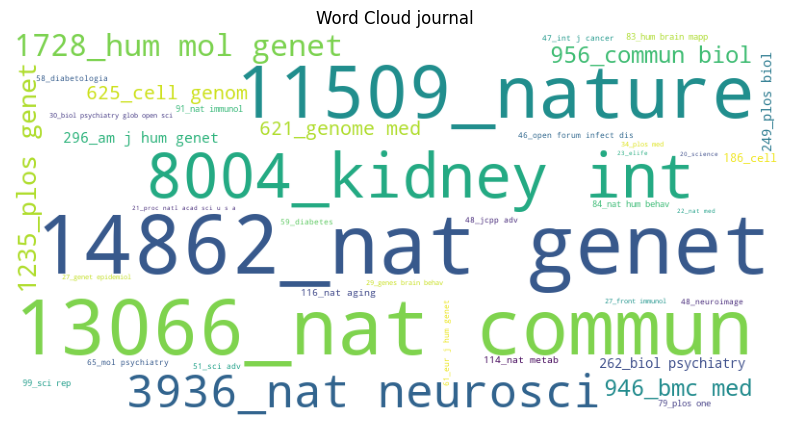

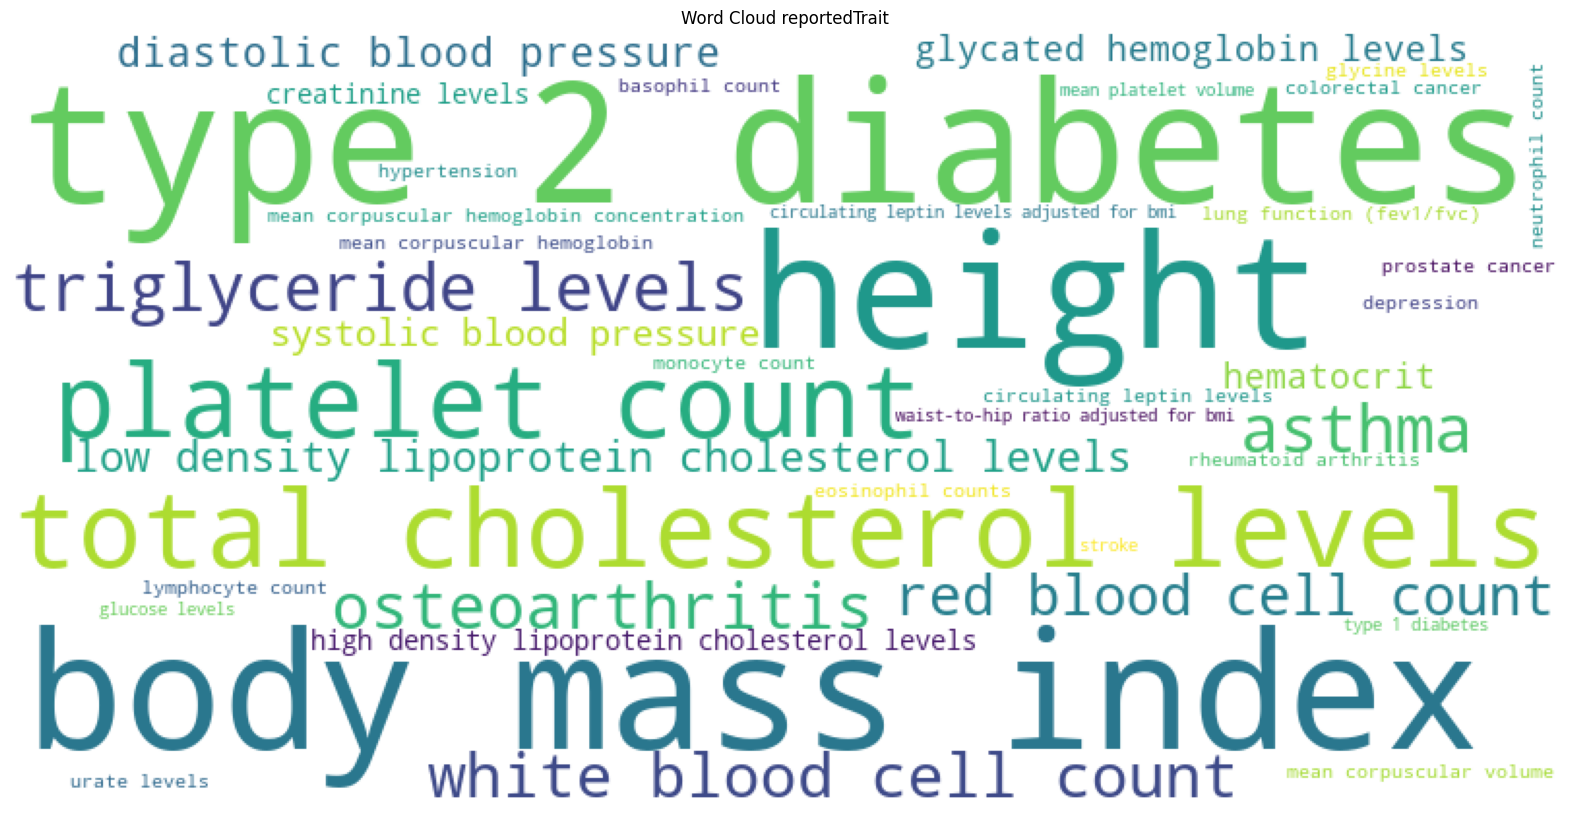

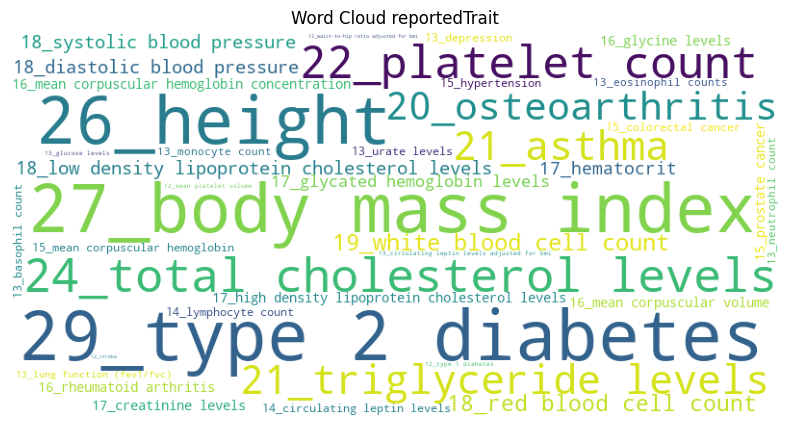

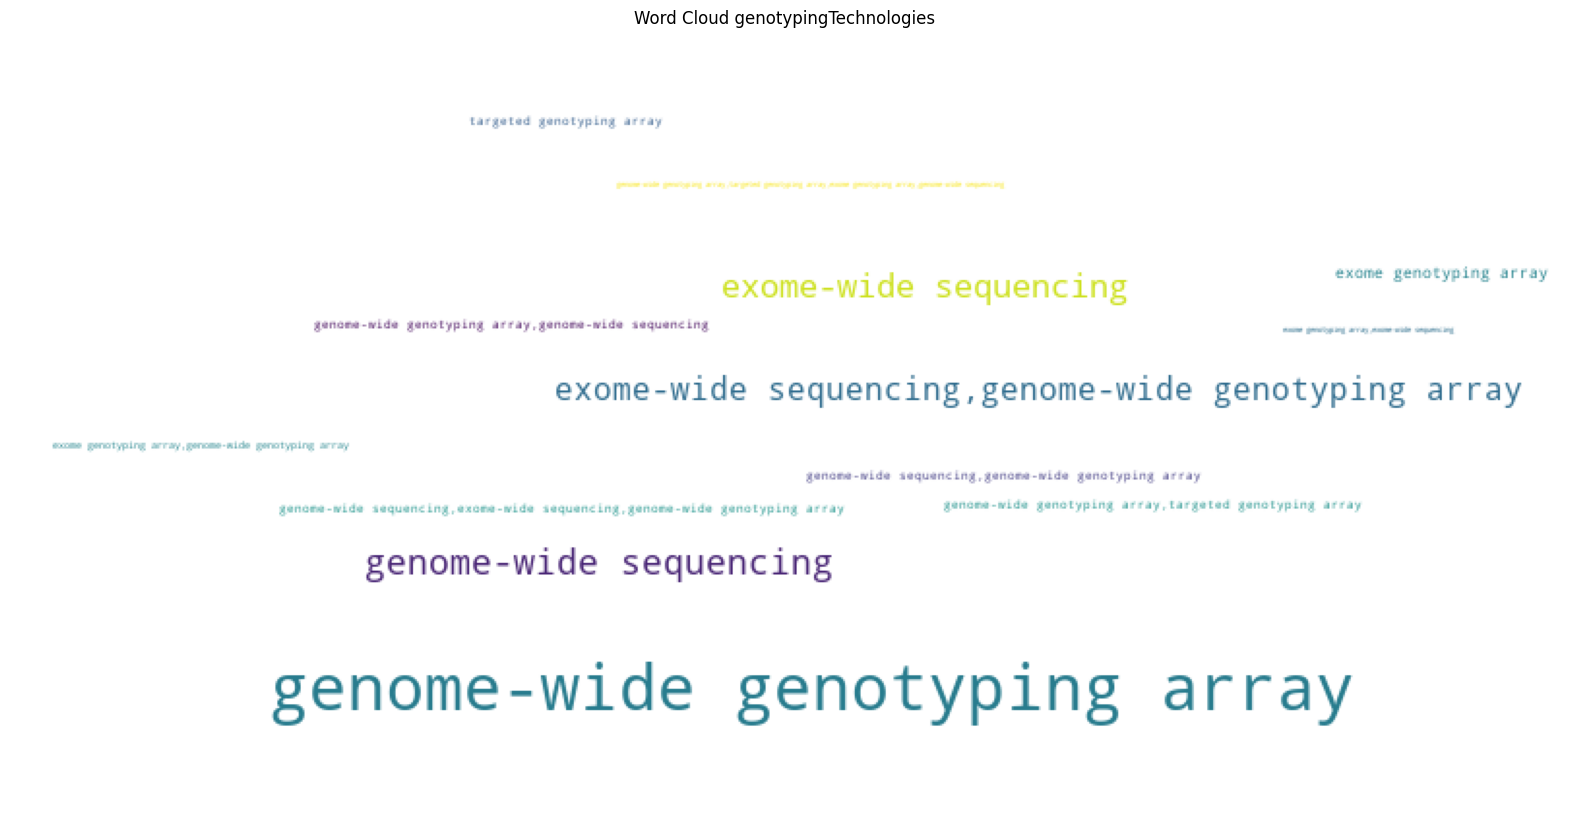

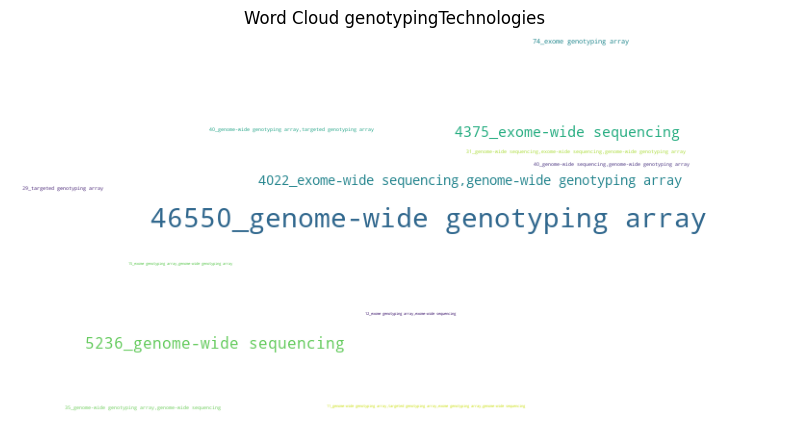

In [54]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

def generate_wordcloud_with_freq(data, column_name, max_words=20, width=800, height=400, background_color='white', save_file=None):
    #data[column_name] = data[column_name].astype(str).str.replace(r'\d+', '', regex=True)
    
    # Convert to lowercase
    data[column_name] = data[column_name].str.lower()
    
    # Strip whitespace
    data[column_name] = data[column_name].str.strip()
    
    # Extract text from the specified column
    text = data[column_name].astype(str).values
    
    words = [word.lower() for word in text]
    
    word_freq = Counter(words)
     
    top_words = dict(word_freq.most_common(40))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)
    
    # Display the word cloud
    plt.figure(figsize=(20, 20))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Word Cloud "+column_name)
    #plt.show()
    plt.savefig(column_name+"_Before.png")
    exactwords = list(wordcloud.words_.keys())
     
    
    ww = []
    ff = []
    tt = []
    for word, freq in top_words.items():
        if word in exactwords:
            #print(f"{word}: {freq}")
 
            for l in range(0,freq):
                tt.append(str(freq)+"_"+word)    
    
    word_freq = Counter(tt)
    #print(pd.DataFrame(word_freq).head())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Word Cloud "+column_name)
    #plt.show()
    plt.savefig(column_name+"_After.png")    
    
     
 
generate_wordcloud_with_freq(data, column_name='efoTraits', save_file="wordcloud.png")
generate_wordcloud_with_freq(data, column_name='firstAuthor', save_file="wordcloud.png")
generate_wordcloud_with_freq(data, column_name='journal', save_file="wordcloud.png")
generate_wordcloud_with_freq(data, column_name='reportedTrait', save_file="wordcloud.png")
generate_wordcloud_with_freq(data, column_name='discoverySampleAncestry', save_file="wordcloud.png")
generate_wordcloud_with_freq(data, column_name='genotypingTechnologies', save_file="wordcloud.png")